In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import cv2
import albumentations as A

In [22]:
%matplotlib qt

# Load some samples

In [30]:
DATA_PATH = '../data/brain_images/'

subjects = [i for i in os.listdir(DATA_PATH) if i.find('.')==-1]



In [31]:
subjects

['TCGA_HT_8111_19980330',
 'TCGA_HT_7690_19960312',
 'TCGA_DU_6407_19860514',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_7294_19890104',
 'TCGA_HT_7856_19950831',
 'TCGA_CS_4941_19960909',
 'TCGA_DU_A5TY_19970709',
 'TCGA_DU_A5TS_19970726',
 'TCGA_HT_8113_19930809',
 'TCGA_DU_8168_19970503',
 'TCGA_CS_6186_20000601',
 'TCGA_CS_6665_20010817',
 'TCGA_FG_7637_20000922',
 'TCGA_DU_8163_19961119',
 'TCGA_CS_5396_20010302',
 'TCGA_DU_8167_19970402',
 'TCGA_DU_8164_19970111',
 'TCGA_CS_5397_20010315',
 'TCGA_HT_7475_19970918',
 'TCGA_DU_A5TR_19970726',
 'TCGA_DU_6401_19831001',
 'TCGA_DU_5851_19950428',
 'TCGA_DU_6399_19830416',
 'TCGA_FG_6688_20020215',
 'TCGA_HT_7680_19970202',
 'TCGA_HT_8018_19970411',
 'TCGA_DU_7306_19930512',
 'TCGA_CS_4943_20000902',
 'TCGA_CS_6668_20011025',
 'TCGA_DU_6405_19851005',
 'TCGA_DU_A5TW_19980228',
 'TCGA_HT_A5RC_19990831',
 'TCGA_EZ_7264_20010816',
 'TCGA_DU_8166_19970322',
 'TCGA_CS_6667_20011105',
 'TCGA_DU_8162_19961029',
 'TCGA_HT_7616_19940813',
 'TCGA_CS_66

/home/dmitriishubin/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


error: OpenCV(4.4.0) /tmp/pip-req-build-njn2fp78/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


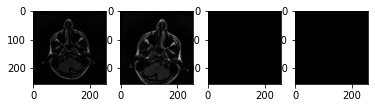

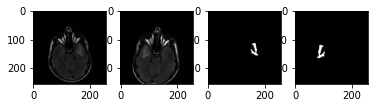

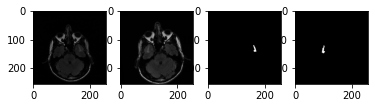

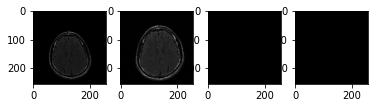

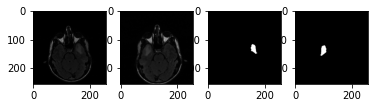

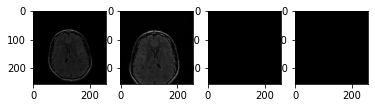

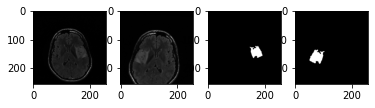

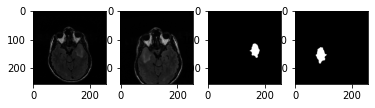

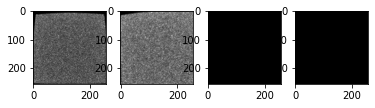

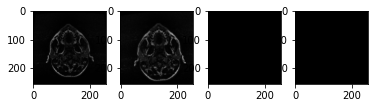

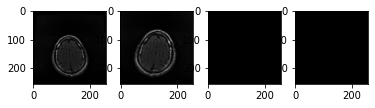

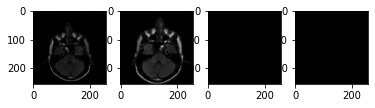

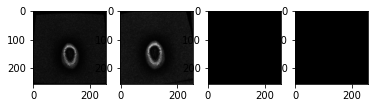

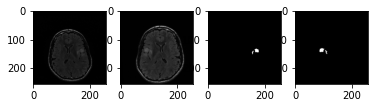

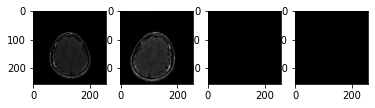

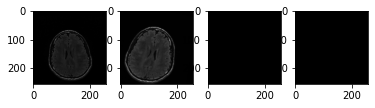

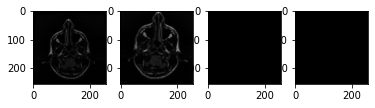

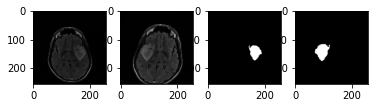

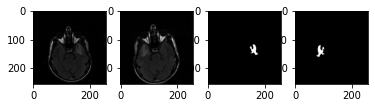

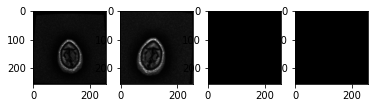

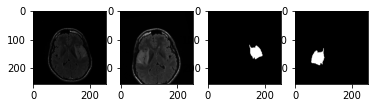

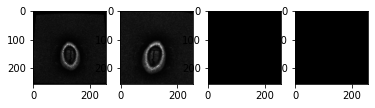

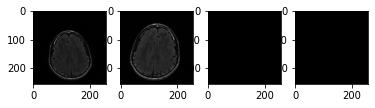

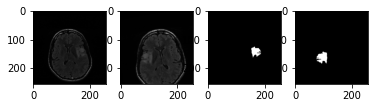

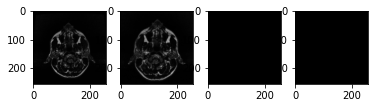

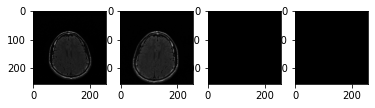

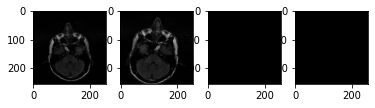

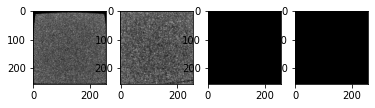

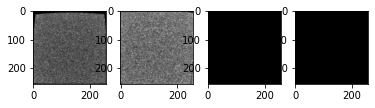

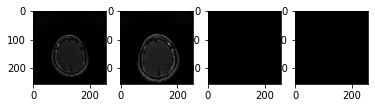

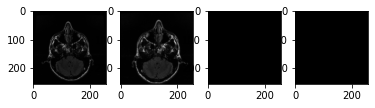

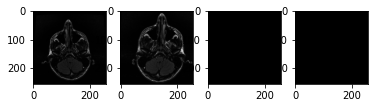

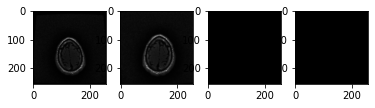

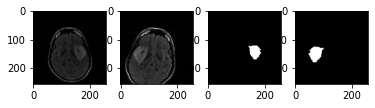

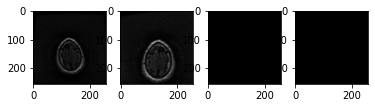

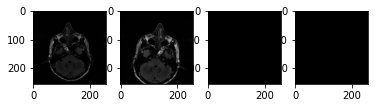

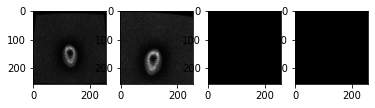

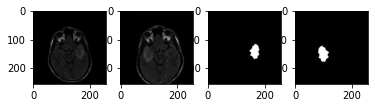

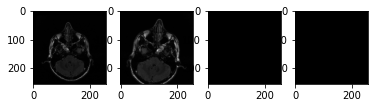

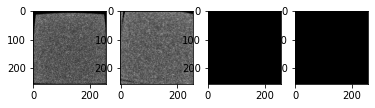

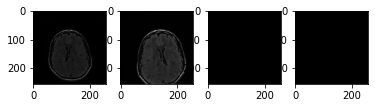

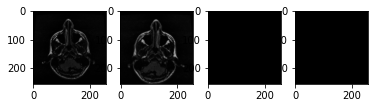

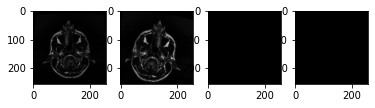

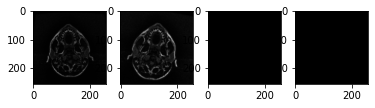

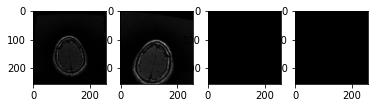

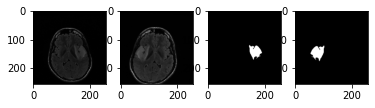

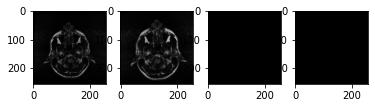

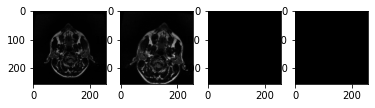

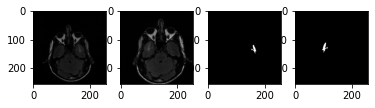

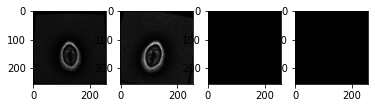

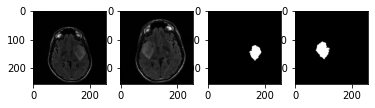

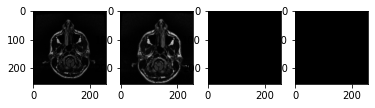

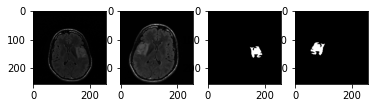

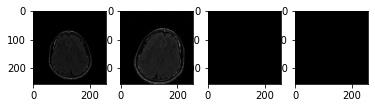

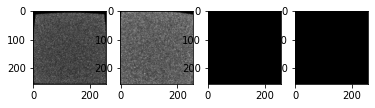

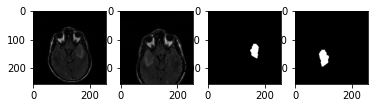

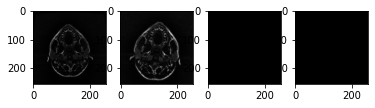

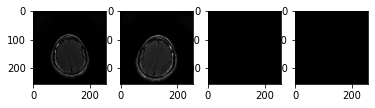

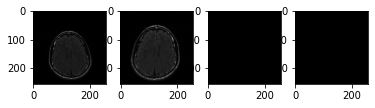

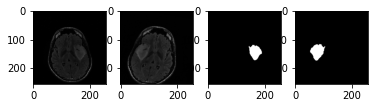

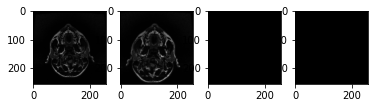

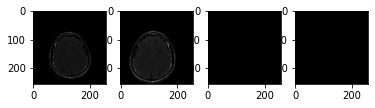

In [32]:
subject = 'TCGA_HT_A61B_19991127'#subjects[-1]

images = [i[:-4] for i in os.listdir(DATA_PATH+subject) if i.find('_mask')==-1]
for image in images:
    mask=cv2.imread(DATA_PATH+subject+'/'+image+'_mask.tif',cv2.IMREAD_COLOR)
    image=cv2.imread(DATA_PATH+subject+'/'+image+'.tif',cv2.IMREAD_COLOR)


    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    image= (image/255)**(1.5)
    
    aug  = A.Compose([
                    A.HorizontalFlip(p=1),
                    A.Rotate(limit=10, p=1),
                    A.RandomSizedCrop(min_max_height=(220, 240), height=256, width=256, p=1)
            ])

    augmented = aug(image=image, mask=mask)

    image_aug = augmented['image']
    mask_aug = augmented['mask']
    
    f, axarr = plt.subplots(1,4) 
    axarr[0].imshow(image, cmap='gray')
    axarr[1].imshow(image_aug, cmap='gray')
    axarr[2].imshow(mask, cmap='gray')
    axarr[3].imshow(mask_aug, cmap='gray')


In [33]:
a,b = [0,3]
a
b

3

In [34]:
a

0